# generate lists of words to explain the clusters

### Feb 8 2020, Brendan Chambers

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

import pymysql
import pickle
import json

import numpy as np
from sklearn.decomposition import PCA
import networkx as nx

import hdbscan
import umap

import os
import time
import random
import re

import spacy
from gensim.models import Word2Vec

from pmids2vec import pmids2vec
from pmids2corpus import pmids2corpus


In [2]:
### control params

In [3]:
#path2clusteredPMIDs = 'data_processing_feb2020/abstracts_2018_250k.json'
#model_dir = 'data_processing_feb2020/titles_2018_250k'

#path2clusteredPMIDs = 'data_processing_feb2020/pmids_2018_200k.json'
#model_dir = 'data_processing_feb2020/abstracts_2018_200k'

#path2clusteredPMIDs = 'data_processing_feb2020/pmids_2018_250k.json'
#model_dir = 'data_processing_feb2020/titles_2018_250k'

path2clusteredPMIDs = 'data_processing_feb2020/pmids_2018_500k.json'
model_dir = 'data_processing_feb2020/titles_2018_500k'

In [4]:
## number of samples
with open(path2clusteredPMIDs, 'r') as f:
    data = json.load(f)
N_samples = len(data['pmids'])

dir_files = os.listdir(model_dir)

samples = {}
for i_sample in range(N_samples):
    model_names = []
    for f in dir_files:
        if '.model' in f:
            if '_{}_'.format(i_sample) in f:
                modelpath = os.path.join(model_dir, f)
                model_names.append(modelpath)

    model_names = sorted(model_names)  # sort by order of sample, order of cluster
    short_names = []
    for path in model_names:
        print(path)
        
        short_name = str.split(path,'/')[-1]
        print(short_name)
        short_names.append(short_name)
    print('-----------')
        
    samples[i_sample] = {}
    samples[i_sample]['model_names'] = model_names
    samples[i_sample]['short_names'] = short_names


data_processing_feb2020/titles_2018_500k/titles_0_cluster0_2018_500k_titles.model
titles_0_cluster0_2018_500k_titles.model
data_processing_feb2020/titles_2018_500k/titles_0_cluster1_2018_500k_titles.model
titles_0_cluster1_2018_500k_titles.model
data_processing_feb2020/titles_2018_500k/titles_0_cluster2_2018_500k_titles.model
titles_0_cluster2_2018_500k_titles.model
data_processing_feb2020/titles_2018_500k/titles_0_cluster3_2018_500k_titles.model
titles_0_cluster3_2018_500k_titles.model
data_processing_feb2020/titles_2018_500k/titles_0_cluster4_2018_500k_titles.model
titles_0_cluster4_2018_500k_titles.model
-----------
data_processing_feb2020/titles_2018_500k/titles_1_cluster0_2018_500k_titles.model
titles_1_cluster0_2018_500k_titles.model
data_processing_feb2020/titles_2018_500k/titles_1_cluster1_2018_500k_titles.model
titles_1_cluster1_2018_500k_titles.model
data_processing_feb2020/titles_2018_500k/titles_1_cluster2_2018_500k_titles.model
titles_1_cluster2_2018_500k_titles.model
data

### load in word2vec models trained on each coarse cluster

In [5]:
# temp, recreate the list of file names without re-training the w2v models

for i_sample in range(N_samples):
    print("sample {}".format(i_sample))
    print('---------')
    
    #models = {}
    
    N_clusters = len(samples[i_sample]['model_names'])
    cluster_cmap = plt.cm.viridis(np.linspace(0,1,N_clusters+1))
    samples[i_sample]['c'] = cluster_cmap
    print(samples[i_sample]['c'])
    
    for i_name, model_name in enumerate(samples[i_sample]['model_names']):

        short_name = samples[i_sample]['short_names'][i_name]
        print(short_name)

        model = Word2Vec.load(model_name)
        samples[i_sample][short_name] = {}
        samples[i_sample][short_name]['w2v_model'] = model
        #models[short_name] = model
        print('{} words '.format(len(model.wv.vocab)))  # length of the vocab dict
        print()
    

sample 0
---------
[[0.267004 0.004874 0.329415 1.      ]
 [0.253935 0.265254 0.529983 1.      ]
 [0.163625 0.471133 0.558148 1.      ]
 [0.134692 0.658636 0.517649 1.      ]
 [0.477504 0.821444 0.318195 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
titles_0_cluster0_2018_500k_titles.model
1496 words 

titles_0_cluster1_2018_500k_titles.model
1610 words 

titles_0_cluster2_2018_500k_titles.model
1903 words 

titles_0_cluster3_2018_500k_titles.model
1740 words 

titles_0_cluster4_2018_500k_titles.model
1560 words 

sample 1
---------
[[0.267004 0.004874 0.329415 1.      ]
 [0.253935 0.265254 0.529983 1.      ]
 [0.163625 0.471133 0.558148 1.      ]
 [0.134692 0.658636 0.517649 1.      ]
 [0.477504 0.821444 0.318195 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
titles_1_cluster0_2018_500k_titles.model
1471 words 

titles_1_cluster1_2018_500k_titles.model
1629 words 

titles_1_cluster2_2018_500k_titles.model
1949 words 

titles_1_cluster3_2018_500k_titles.model
1743 words 

titles

number of pmids: 41834
number of pmids: 17465
number of pmids: 12453
number of pmids: 104908
number of pmids: 12308
------------------
number of pmids: 38414
number of pmids: 17328
number of pmids: 10429
number of pmids: 103668
number of pmids: 11686
------------------
number of pmids: 38493
number of pmids: 17526
number of pmids: 11256
number of pmids: 103935
number of pmids: 12372
------------------


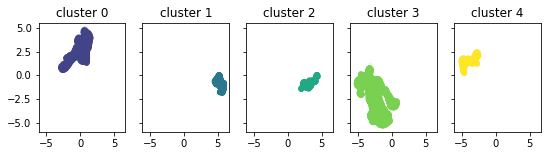

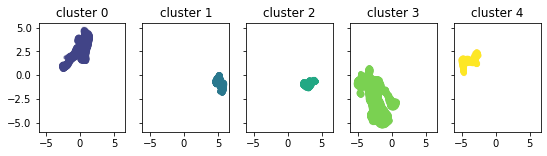

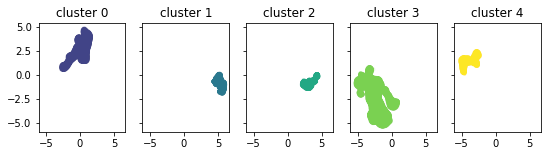

In [6]:
# re-plot the clusters to verify which is which
    
with open(path2clusteredPMIDs,'r') as f:
    data = json.load(f)
    pmids = data['pmids']
    summary_coords = data['summary_coords']
    
sample_IDs = [k for k in pmids.keys()]

for i_sample, sample in enumerate(sample_IDs):  # todo automate number of samples detection

    clusters = [k for k in pmids[sample].keys()]
    N_COL, N_ROW = len(clusters), 1
    fig, axs = plt.subplots(N_ROW, N_COL, sharex='all', sharey='all',
                               figsize=(9,2))

    for i_cluster, cluster in enumerate(clusters):
        print('number of pmids: {}'.format(len(summary_coords[sample][cluster])))
        xx = [p[0] for p in summary_coords[sample][cluster]]
        yy = [p[1] for p in summary_coords[sample][cluster]]

        cluster_color = samples[i_sample]['c'][i_cluster+1]  # 0th index is the -1 null cluster, so offset by 1
        axs[int(i_cluster)].scatter(xx,
                               yy,
                              marker='.',
                              color=cluster_color,
                              alpha=0.1)
        axs[int(i_cluster)].set_title('cluster {}'.format(i_cluster))
        
    print('------------------')

number of pmids: 41834
number of pmids: 17465
number of pmids: 12453
number of pmids: 104908
number of pmids: 12308
------------------
number of pmids: 38414
number of pmids: 17328
number of pmids: 10429
number of pmids: 103668
number of pmids: 11686
------------------
number of pmids: 38493
number of pmids: 17526
number of pmids: 11256
number of pmids: 103935
number of pmids: 12372
------------------


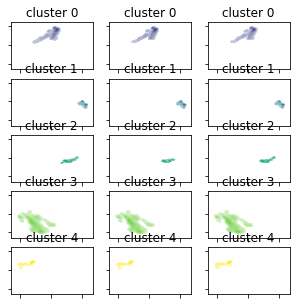

In [7]:
# prettier plot than above - but will only properly work when N_clusters is matched across samples

prettyPlot = True
if prettyPlot:    
    
    with open(path2clusteredPMIDs,'r') as f:
        data = json.load(f)
        pmids = data['pmids']
        summary_coords = data['summary_coords']

    sample_IDs = [k for k in pmids.keys()]
    N_samples = len(sample_IDs)

    clusters = [k for k in pmids[sample_IDs[0]].keys()]
    N_COL, N_ROW = N_samples, len(clusters)
    fig, axs = plt.subplots(N_ROW, N_COL, sharex='all', sharey='all',
                               figsize=(5,5))

    for i_sample, sample in enumerate(sample_IDs):  # todo automate number of samples detection

        for i_cluster, cluster in enumerate(clusters):
            print('number of pmids: {}'.format(len(summary_coords[sample][cluster])))
            xx = [p[0] for p in summary_coords[sample][cluster]]
            yy = [p[1] for p in summary_coords[sample][cluster]]

            cluster_color = samples[i_sample]['c'][i_cluster+1]  # 0th index is the -1 null cluster, so offset by 1
            #axs[int(i_cluster), i_sample].scatter(xx,
            #                       yy,
            #                      marker='.',
            #                      color=cluster_color)
            sns.kdeplot(xx, yy,
                        color=cluster_color,
                        shade=True, shade_lowest=False,
                        ax=axs[i_cluster, i_sample])
            axs[int(i_cluster), i_sample].set_title('cluster {}'.format(i_cluster))
            axs[int(i_cluster), i_sample].set_xticklabels([])
            axs[int(i_cluster), i_sample].set_yticklabels([])

        print('------------------')
        
    plt.savefig(os.path.join( model_dir, 'cluster rows.png'))
    plt.savefig(os.path.join( model_dir, 'cluster rows.pdf'))

In [8]:
# build a networkx graph for each word similarity network

----------------
number of dimensions D: 20
dimensions: (1496, 1496)
--------------
number of dimensions D: 20
dimensions: (1610, 1610)
--------------
number of dimensions D: 20
dimensions: (1903, 1903)
--------------
number of dimensions D: 20
dimensions: (1740, 1740)
--------------
number of dimensions D: 20
dimensions: (1560, 1560)
--------------


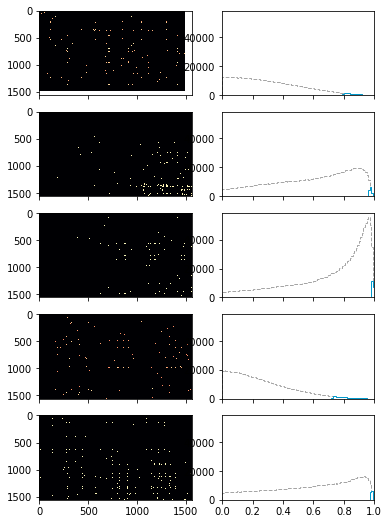

----------------
number of dimensions D: 20
dimensions: (1471, 1471)
--------------
number of dimensions D: 20
dimensions: (1629, 1629)
--------------
number of dimensions D: 20
dimensions: (1949, 1949)
--------------
number of dimensions D: 20
dimensions: (1743, 1743)
--------------
number of dimensions D: 20
dimensions: (1637, 1637)
--------------


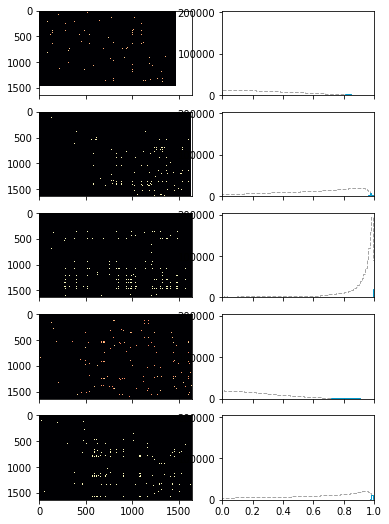

----------------
number of dimensions D: 20
dimensions: (1488, 1488)
--------------
number of dimensions D: 20
dimensions: (1628, 1628)
--------------
number of dimensions D: 20
dimensions: (1929, 1929)
--------------
number of dimensions D: 20
dimensions: (1744, 1744)
--------------
number of dimensions D: 20
dimensions: (1562, 1562)
--------------


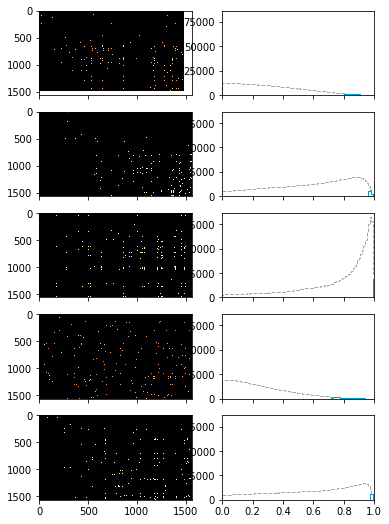

In [9]:
## todo use unique vocabularies for starters
            
for i_sample, sample in enumerate(sample_IDs):
    
    print('----------------')

    # todo should we match vocabulary sizes?
    clusters = samples[i_sample]['model_names']
    N_COL, N_ROW = 2, len(clusters)
    fig, axs = plt.subplots(N_ROW, N_COL, sharex='col', sharey='col',
                               figsize=(6,9))

    nx_graphs = []
    for idx, model_name in enumerate(samples[i_sample]['short_names']):

        model = samples[i_sample][model_name]['w2v_model']

        # the number of nodes is small so we can do this with naive mat mul, nothing clever needed
        
        D = model.wv.vectors.shape[1] # dimensionality of a sample word, any word will do
        print("number of dimensions D: {}".format(D))

        embedding_samples = np.zeros( (len(model.wv.vocab), D) )

        # collect samples
        for i_word, word in enumerate(model.wv.vocab):
            embedding_samples[i_word,:] = model.wv[word] 
        # demean
        for i_word, word in enumerate(model.wv.vocab):
            embedding_samples[i_word,:] -= np.mean(embedding_samples,0)
        # normalize all vectors to the hypersphere
        for i_row,row in enumerate(embedding_samples):
            embedding_samples[i_row,:] /= np.linalg.norm(row,2)
        # compute edge weights via cosine similarity (projection of normalized vectors)
        W = np.matmul(embedding_samples, embedding_samples.T)
        W_raw = W.copy()
        # threshold and clean adjmat
        np.fill_diagonal(W, 0)  # no self-loops
        P_thresh = 99
        thresh_high = np.percentile(W.flatten(), P_thresh)
        boolean_mask = W < thresh_high
        W[boolean_mask] = 0 # 
        print("dimensions: {}".format(np.shape(W)))
        
        axs[idx,0].imshow(W, # [:300,:300],
                         aspect='auto',
                         cmap='magma')
        
        #axs[0,idx].colorbar()
        BINS = np.linspace(0,1,100)
        axs[idx,1].hist(np.tril(W_raw,k=-1)[np.tril(W_raw,k=-1).nonzero()].flatten(),
                        histtype='step',
                        density=False,
                        color=[0.3,0.3,0.3],
                        linestyle='--',
                        bins=BINS,
                        alpha=0.5)
        axs[idx,1].hist(np.tril(W,k=-1)[np.tril(W,k=-1).nonzero()].flatten(),
                        histtype='step',
                        density=False,
                        color=[0,0.6, 0.8],
                        bins=BINS)
        axs[idx,1].set_xlim([0,1])
        
        print('--------------')

        G_nx = nx.from_numpy_matrix(W)  # convert to graph for centrality computation
        nx.set_node_attributes(G_nx,
                               dict((i,w) for i,w in enumerate(model.wv.vocab)),
                               'word')
        d_cent = nx.degree_centrality(G_nx)  # , max_iter=200)
        nx.set_node_attributes(G_nx, d_cent, 'centrality')  # formerly eigen centrality
        nx_graphs.append(G_nx)

        samples[i_sample][model_name]['G_nx'] = G_nx
        samples[i_sample][model_name]['P_thresh'] = P_thresh  # edge threshold on cosine scores
    
    plt.savefig(os.path.join(model_dir,'thresholding s{} c{}.png'.format(i_sample, idx)))
    plt.savefig(os.path.join(model_dir,'thresholding s{} c{}.pdf'.format(i_sample, idx)))
    plt.show()

In [10]:
# plot the adjmats
'''
for i_sample, sample in enumerate(sample_IDs):
    
     # todo should we match vocabulary sizes?
    clusters = samples[i_sample]['model_names']
    (f, ax) = plt.subplots(3,
                           len(clusters),
                           figsize=(10,10))

    community_results = []
    for idx, model_name in enumerate(samples[i_sample]['short_names']):
    #for idx, G in enumerate(nx_graphs):
        G = samples[i_sample][model_name]['G_nx']

        print('computing num triangles...')
        #communities = nx.algorithms.community.label_propagation_communities(G)
        #community_results.append([x for x in communities])

        print('fetching adjmat...')
        W = nx.convert_matrix.to_numpy_matrix(G)
        print('computing cuthull mckee ordering...')
        rcm = list(nx.utils.cuthill_mckee_ordering(G)) # pick the smallest to define the ordering
        print('finished.')

        W = nx.convert_matrix.to_numpy_matrix(G, nodelist=rcm)
        ax[0,idx].imshow(W, aspect='auto', cmap='magma')
        ax[0,idx].set_title('world {} in order #{}'.format(idx, idx))

        degrees = [d for n,d in G.degree()]

        #ax[0,idx].imshow(W,aspect='auto')
        #ax[0,idx].set_title('world {}'.format(idx))

        #ax[1,idx].set_ylim(bottom=0)
        ax[1,idx].hist(degrees, bins=25, histtype='step')
        ax[1,idx].set_title('degree histogram')
        ax[1,idx].set_xlim([0,2500])

        d_eigcent = nx.get_node_attributes(G, 'eigenvector_centrality')
        ax[2,idx].hist([count for count in d_eigcent.values()], bins=25, histtype='step')
        ax[2,idx].set_title(' eigenvector centrality ')
        ax[2,idx].set_xlim([0,0.04])
        
        samples[i_sample][model_name]['G_nx'] = G  # is this redundant?
        
        print('--------')

    plt.savefig('figures_2/network_worlds_overview.pdf')
    plt.savefig('figures_2/network_worlds_overview.png')
'''

"\nfor i_sample, sample in enumerate(sample_IDs):\n    \n     # todo should we match vocabulary sizes?\n    clusters = samples[i_sample]['model_names']\n    (f, ax) = plt.subplots(3,\n                           len(clusters),\n                           figsize=(10,10))\n\n    community_results = []\n    for idx, model_name in enumerate(samples[i_sample]['short_names']):\n    #for idx, G in enumerate(nx_graphs):\n        G = samples[i_sample][model_name]['G_nx']\n\n        print('computing num triangles...')\n        #communities = nx.algorithms.community.label_propagation_communities(G)\n        #community_results.append([x for x in communities])\n\n        print('fetching adjmat...')\n        W = nx.convert_matrix.to_numpy_matrix(G)\n        print('computing cuthull mckee ordering...')\n        rcm = list(nx.utils.cuthill_mckee_ordering(G)) # pick the smallest to define the ordering\n        print('finished.')\n\n        W = nx.convert_matrix.to_numpy_matrix(G, nodelist=rcm)\n       

computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


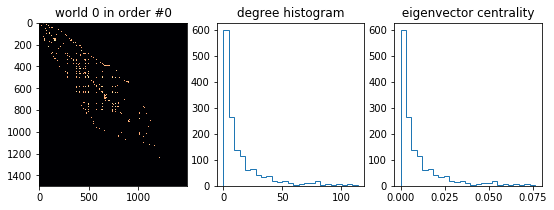

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


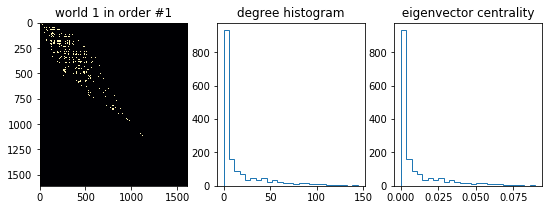

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


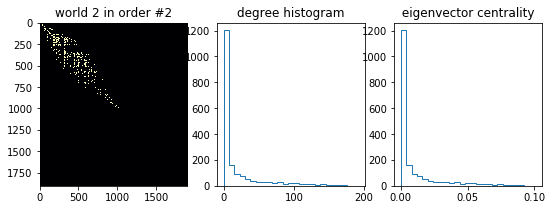

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


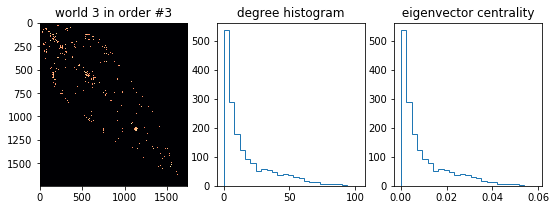

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


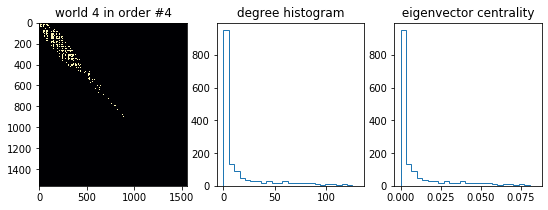

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


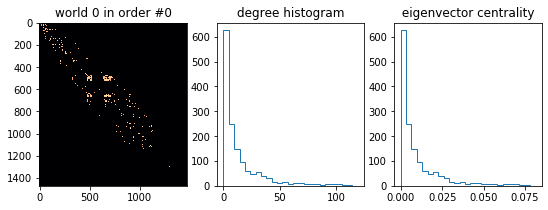

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


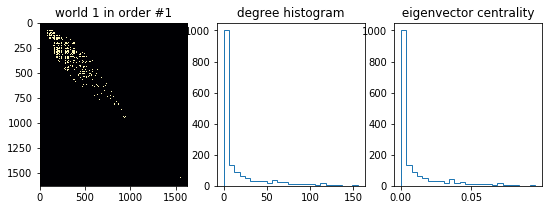

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


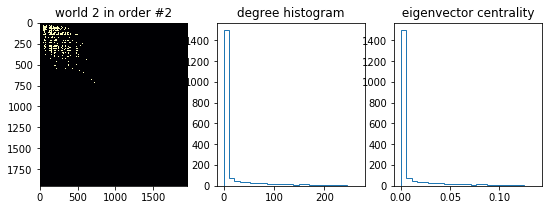

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


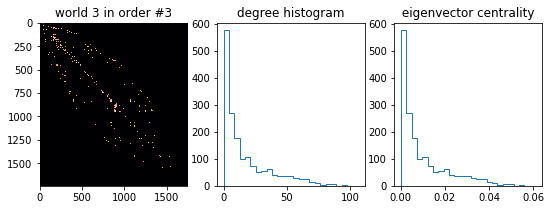

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


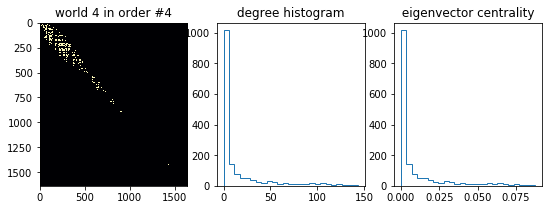

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


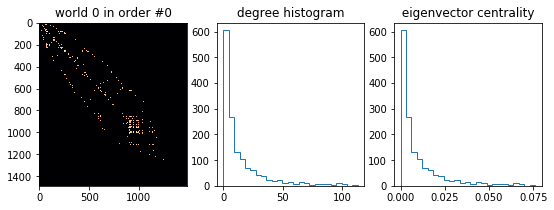

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


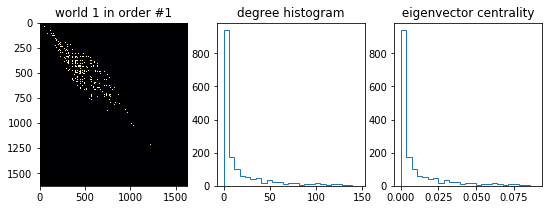

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


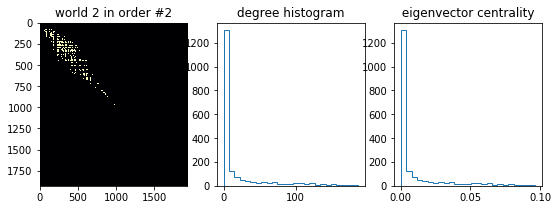

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


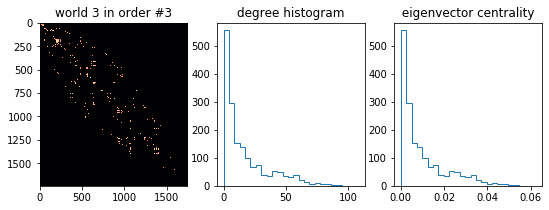

--------
computing num triangles...
fetching adjmat...
computing cuthull mckee ordering...
finished.


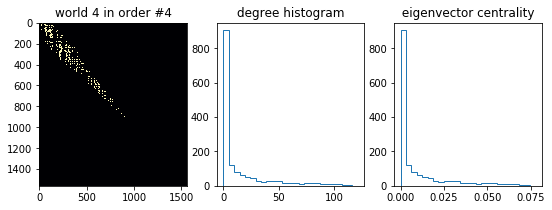

--------


In [11]:
# plot the overview graph statistics for each world

for i_sample, sample in enumerate(sample_IDs):
    
     # todo should we match vocabulary sizes?
    clusters = samples[i_sample]['model_names']

    community_results = []
    for idx, model_name in enumerate(samples[i_sample]['short_names']):
    #for idx, G in enumerate(nx_graphs):
        G = samples[i_sample][model_name]['G_nx']

        print('computing num triangles...')
        #communities = nx.algorithms.community.label_propagation_communities(G)
        #community_results.append([x for x in communities])

        print('fetching adjmat...')
        W = nx.convert_matrix.to_numpy_matrix(G)
        print('computing cuthull mckee ordering...')
        rcm = list(nx.utils.cuthill_mckee_ordering(G)) # pick the smallest to define the ordering
        print('finished.')
        
        (f, ax) = plt.subplots(1,
                       3,
                       figsize=(9,3))

        W = nx.convert_matrix.to_numpy_matrix(G, nodelist=rcm)
        ax[0].imshow(W, aspect='auto', cmap='magma')
        ax[0].set_title('world {} in order #{}'.format(idx, idx))

        degrees = [d for n,d in G.degree()]

        #ax[0,idx].imshow(W,aspect='auto')
        #ax[0,idx].set_title('world {}'.format(idx))

        #ax[1,idx].set_ylim(bottom=0)
        ax[1].hist(degrees, bins=25, histtype='step')
        ax[1].set_title('degree histogram')
        #ax[1].set_xlim([0,2500])

        '''
        d_triangles = nx.get_node_attributes(G,'triangles')
        ax[2,idx].hist([count for count in d_triangles.values()], bins=25, histtype='step')
        ax[2,idx].set_title('triangles histogram')
        ax[2,idx].set_xlim([0,80000])
        '''

        d_cent = nx.get_node_attributes(G, 'centrality')
        ax[2].hist([count for count in d_cent.values()], bins=25, histtype='step')
        ax[2].set_title(' eigenvector centrality ')
        #ax[2].set_xlim([0,0.04])
        
        samples[i_sample][model_name]['G_nx'] = G  # is this redundant?
        
        plt.savefig('figures_2/network_worlds_overview s{} c{}.pdf'.format(
                                                                    i_sample,
                                                                    i_cluster))
        plt.savefig('figures_2/network_worlds_overview s{} c{}.png'.format(
                                                                    i_sample,
                                                                    i_cluster))
        plt.show()
        
        print('--------')



computing cuthull mckee ordering...
finished.
computing cuthull mckee ordering...
finished.
computing cuthull mckee ordering...
finished.
computing cuthull mckee ordering...
finished.
computing cuthull mckee ordering...
finished.


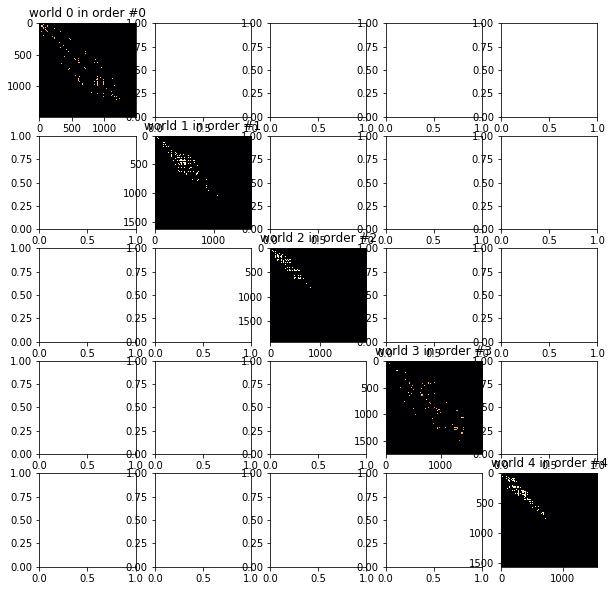

In [12]:
# plot each adjmat in cuthill-mckee order (for the first sample)

# todo orient the overview plot horizontally instead (mimicking the plot above)

final_idx = len(samples) - 1
clusters = samples[final_idx]['model_names']
(f, ax) = plt.subplots(len(clusters),
                       len(clusters),
                       figsize=(10,10))

for reference_id in range(len(clusters)):
    
    print('computing cuthull mckee ordering...')
    rcm = list(nx.utils.cuthill_mckee_ordering(nx_graphs[reference_id])) # pick the smallest to define the ordering
    print('finished.')

    W = nx.convert_matrix.to_numpy_matrix(nx_graphs[reference_id], nodelist=rcm)
    ax[reference_id,reference_id].imshow(W, aspect='auto', cmap='magma')
    ax[reference_id,reference_id].set_title('world {} in order #{}'.format(reference_id, reference_id))

#plt.savefig('cuthill_mckee.pdf')
#plt.savefig('cuthill_mckee.png')
    

In [13]:
### helper function

In [14]:
def id_eigcentral_nodes(sample_id, cluster_id, export_prefix, model_dir):
    '''
    for sample set specified by model_dir
    for sample id := sample id
    for cluster of pmids within the sample cluster_id
    using name identifier := export prefix
    
    plot+save high eigenvector central nodes
    plot+save the network of their interconnections
    export the list of central words & corresponding node_ids
    '''

    # todo incorporate sample_id
    model_name = samples[sample_id]['short_names'][cluster_id]
    G_thresh = samples[sample_id][model_name]['G_nx']
    
    print('fetching node attributes...')
    d_cent = nx.get_node_attributes(G_thresh,'centrality')
    d_words = nx.get_node_attributes(G_thresh, 'word')

    # sort ascending
    top_nodes = [t[0] for t in sorted(d_cent.items(),
                                      key=lambda x: x[1],
                                      reverse=True)]
    scores = [t[1] for t in sorted(d_cent.items(),
                                      key=lambda x: x[1],
                                      reverse=True)]

    top_words = [d_words[i] for i in top_nodes]  # idxs -> words

    # print
    K = int(np.floor(0.05 * len(scores)))
    print(top_nodes[:K])
    print(top_words[:K])

    plt.figure()
    plt.plot(scores[:K],color='r')
    plt.plot(scores, color=[0,0,0,0.25], linestyle=':')
    
    plt.savefig('figures_3/centrality_scores {} s{} c{}.png'.format(export_prefix,
                                                            sample_id,
                                                            cluster_id))
    plt.savefig('figures_3/centrality_scores {} s{} c{}.pdf'.format(export_prefix,
                                                            sample_id,
                                                            cluster_id))

    node_subset = top_nodes[:K]            
    G = G_thresh.subgraph(node_subset)    
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

    #print('fetching node attributes...')
    #d_eigcent = nx.get_node_attributes(nx_graphs[cluster_id],'eigenvector_centrality')

    print('generating labels...')
    labels = dict( (node,top_words[i]) for i,node in enumerate(G.nodes()))
    
    print('computing layout...')
    #d_layout_full = nx.spring_layout(nx_graphs[cluster_id]) # .subgraph(top_nodes[:2000]))  # TEMP cutoff for prototyping
    #d_layout = {k: d_layout_full[k] for k in top_nodes[:K]}
    #d_layout = {k: d_layout_full[k] for k in all_neighbors}
    #d_layout = nx.random_layout(G)
    d_layout = nx.spring_layout(G)
    print('layout finished')

    SCALE = 10000
    node_sizes = SCALE*np.array([f for f in scores])
    
    print('plotting...')
    plt.figure()
    nx.draw(G,
           pos=d_layout, # s[idx],  #d_layout
           with_labels=False,
           node_color=[[0.1,0.3,0.2,0.1]],
           node_size=node_sizes, #  labels=labels,
           edgelist=edges,
           edge_color=weights,
           width=0.25,
           edge_cmap=plt.cm.Blues) 
    
    plt.savefig('figures_3/layout {} s{} c{}.png'.format(export_prefix,
                                                         sample_id,
                                                         cluster_id))
    plt.savefig('figures_3/layout {} s{} c{}.pdf'.format(export_prefix,
                                                         sample_id,
                                                         cluster_id))
    save_obj = {'central_nodes': top_nodes,
                'central_words': top_words}
    save_path = "{}/centrality s{} c{}.json".format(model_dir,
                                                     sample_id,
                                                     cluster_id)
    with open(save_path,'w') as f:
        json.dump(save_obj, f)

In [15]:
# old version
# this uses eig centrality but now using degree centrality in other function

def plot_eigcent_nodes(cluster_id):
    
    d_eigcent = nx.get_node_attributes(nx_graphs[cluster_id],'eigenvector_centrality')
    d_words = nx.get_node_attributes(nx_graphs[cluster_id], 'word')

    # sort ascending
    top_nodes = [t[0] for t in sorted(d_eigcent.items(),
                                      key=lambda x: x[1],
                                      reverse=True)]
    scores = [t[1] for t in sorted(d_eigcent.items(),
                                      key=lambda x: x[1],
                                      reverse=True)]

    top_words = [d_words[i] for i in top_nodes]  # idxs -> words

    # print
    K = int(np.floor(0.015 * len(scores)))
    print(top_nodes[:K])
    print(top_words[:K])

    plt.figure()
    plt.plot(scores[:K],color='r')
    plt.plot(scores, color=[0,0,0,0.25], linestyle=':')
    
    plt.savefig('figures_2/eigscores {}.png'.format(cluster_id))
    plt.savefig('figures_2/eigscores {}.pdf'.format(cluster_id))

    node_subset = top_nodes[:K]
    '''
    print('crawling neighborhood...')
    all_neighbors = []
    for i,node in enumerate(node_subset):
        all_neighbors.append(node)
        for neighbor in nx_graphs[cluster_id][node]:
            all_neighbors.append(neighbor)
    all_neighbors = list(set(all_neighbors))
    print('{} neighbors fetched'.format(len(all_neighbors)))
    '''
    all_neighbors = node_subset
            
    #G = nx_graphs[cluster_id].subgraph(node_subset)
    G = nx_graphs[cluster_id].subgraph(all_neighbors)
    
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    #print(weights)

    print('fetching node attributes...')
    d_eigcent = nx.get_node_attributes(nx_graphs[cluster_id],'eigenvector_centrality')

    print('generating labels...')
    labels = dict( (node,top_words[i]) for i,node in enumerate(G.nodes()))
    
    print('computing layout...')
    d_layout_full = nx.spring_layout(nx_graphs[cluster_id]) # .subgraph(top_nodes[:2000]))  # TEMP cutoff for prototyping
    #d_layout = {k: d_layout_full[k] for k in top_nodes[:K]}
    d_layout = {k: d_layout_full[k] for k in all_neighbors}
    #d_layout = nx.random_layout(G)
    print('layout finished')

    SCALE = 1000
    node_sizes = SCALE*np.array([f for f in scores])
    
    print('plotting...')
    plt.figure()
    nx.draw(G,
           pos=d_layout, # s[idx],  #d_layout
           with_labels=False,
           node_color=[[0.1,0.3,0.2,0.1]],
           node_size=node_sizes, #  labels=labels,
           edgelist=edges,
           edge_color=weights,
           width=0.25,
           edge_cmap=plt.cm.Blues) 
    
    plt.savefig('figures_2/layout {}.png'.format(cluster_id))
    plt.savefig('figures_2/layout {}.pdf'.format(cluster_id))
    
    plt.show()


-------------------
sample: 0

sample 0 cluster 0
fetching node attributes...
[1065, 909, 1241, 1426, 711, 712, 1048, 1164, 1184, 1229, 551, 722, 1419, 292, 683, 966, 1168, 556, 1375, 334, 993, 1280, 969, 1000, 60, 1269, 755, 1227, 1067, 1093, 620, 1115, 1177, 1380, 766, 779, 778, 836, 1055, 1092, 1108, 1495, 234, 293, 829, 929, 1444, 430, 1022, 338, 354, 1008, 1197, 684, 917, 1487, 690, 967, 1290, 335, 1085, 1196, 61, 318, 838, 1332, 698, 1088, 432, 602, 837, 916, 882, 977]
['testing', 'future', 'aspects', 'considerations', 'trials', 'oncology', 'era', 'intervention', 'recent', 'directions', 'practice', 'concepts', 'monitoring', 'current', 'challenges', 'precision', 'opportunities', 'treatments', 'treating', 'perspectives', 'pathophysiology', 'personalized', 'noninvasive', 'allergy', 'advances', 'data', 'old', 'guidelines', 'genetics', 'basis', 'clinical', 'perspective', 'systematic', 'common', 'therapies', 'research', 'translational', 'pediatric', 'literature', 'progress', 'safety',

layout finished
plotting...

sample 1 cluster 1
fetching node attributes...
[1537, 1478, 1353, 1512, 1293, 1363, 1540, 1007, 1082, 1340, 1457, 1069, 1225, 1263, 1280, 1347, 1213, 1236, 1265, 1009, 1288, 1445, 1029, 1211, 1531, 1191, 1331, 1602, 810, 878, 1370, 919, 938, 1156, 1323, 1456, 1106, 1437, 1552, 1223, 1579, 1532, 1251, 1371, 1503, 805, 1326, 1487, 1329, 1544, 1215, 1404, 1547, 1401, 1237, 1285, 1343, 1560, 1626, 688, 1402, 1453, 1614, 975, 1068, 1148, 1468, 1032, 1492, 1040, 1443, 1554, 1376, 1222, 1434, 1523, 851, 1256, 1246, 1315, 1515]
['color', 'versus', 'phases', 'diamond', 'superlattices', 'change', 'switchable', 'polymerization', 'exchange', 'revealed', 'zeolitic', 'or', 'features', 'photoinduced', 'eutectic', 'studied', 'valence', 'obtained', 'pulsed', 'acetate', 'memory', 'continuous', 'strong', 'two', 'resistive', 'droplets', 'microstructures', 'blends', 'mixed', 'time', 'ti', 'assemblies', 'emulsion', 'linear', 'switching', 'hot', 'processes', 'ethylene', 'gap', 'd

/home/brendan/anaconda3/envs/embedding-feb2020/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/brendan/anaconda3/envs/embedding-feb2020/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



sample 2 cluster 1
fetching node attributes...
[1494, 1340, 1155, 1238, 1333, 988, 1533, 950, 1299, 1428, 1552, 1206, 1232, 1376, 1142, 1434, 1577, 864, 1113, 1539, 1543, 1480, 1145, 1269, 1562, 1460, 1303, 1181, 1569, 1578, 1626, 1279, 1512, 1537, 1352, 1528, 785, 1183, 1374, 1422, 1216, 1481, 1530, 1482, 1497, 956, 1091, 1148, 1554, 1469, 817, 1472, 1264, 1617, 1093, 1402, 1404, 1431, 1598, 1616, 1419, 1614, 1047, 1073, 1588, 1373, 1314, 1263, 1397, 1479, 1116, 1453, 521, 1201, 1278, 1536, 1042, 1210, 1396, 1050, 856]
['hot', 'memory', 'chromatography', 'or', 'generated', 'cubic', 'made', 'internal', 'evidence', 'pair', 'ultraviolet', 'templated', 'versus', 'eutectic', 'monolayers', 'correlation', 'calculation', 'polymerization', 'ionization', 'atom', 'nanocrystal', 'measurements', 'exchange', 'energies', 'anomalous', 'eu', 'excited', 'measurement', 'largearea', 'heat', 'porphyrin', 'driven', 'obtained', 'beyond', 'without', 'matter', 'laser', 'mg', 'li', 'dependent', 'anion', 'asse

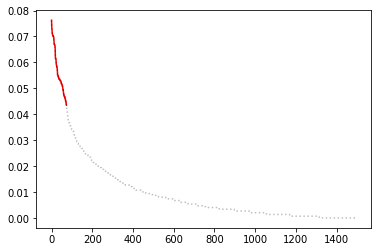

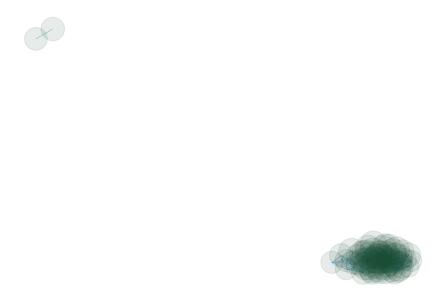

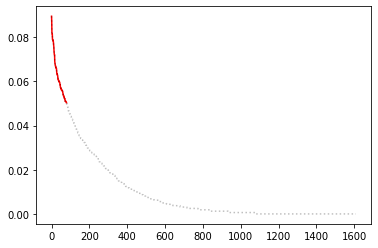

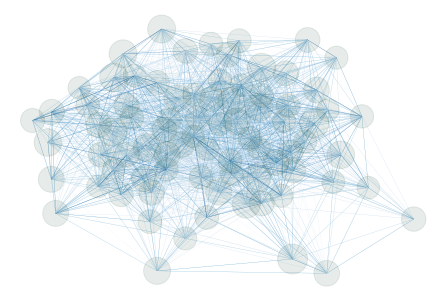

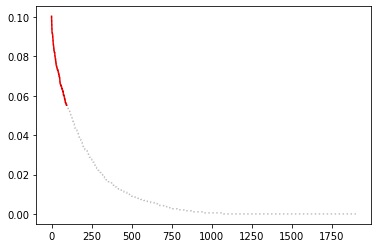

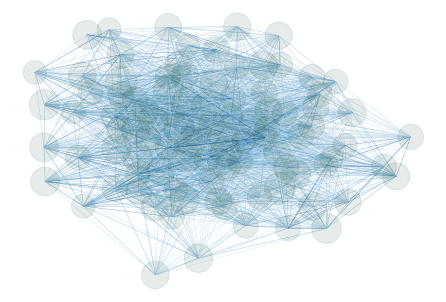

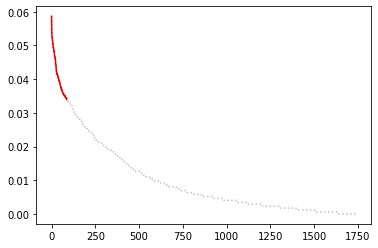

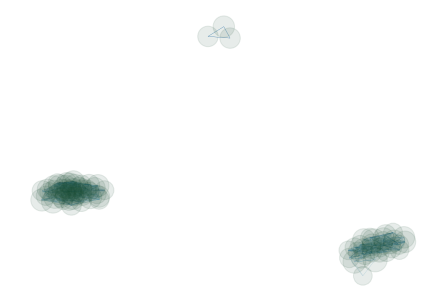

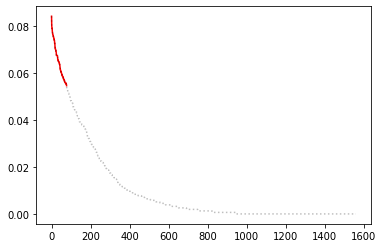

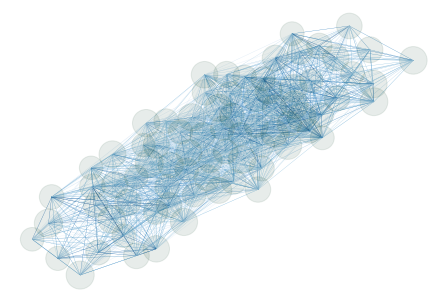

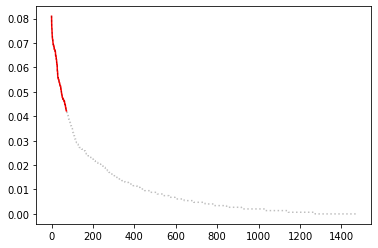

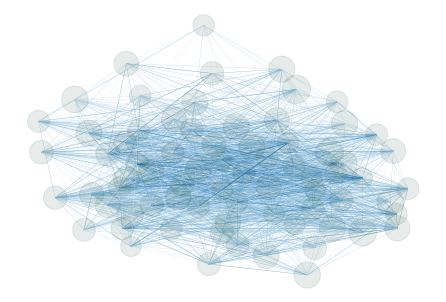

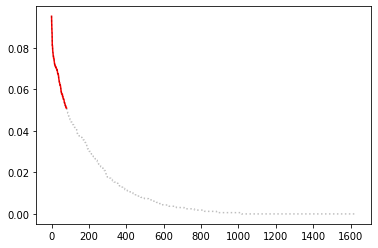

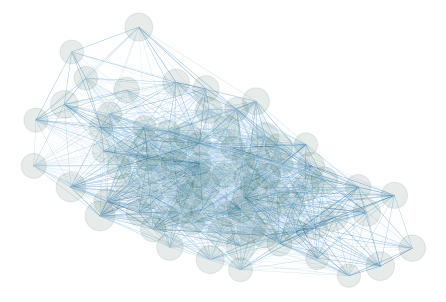

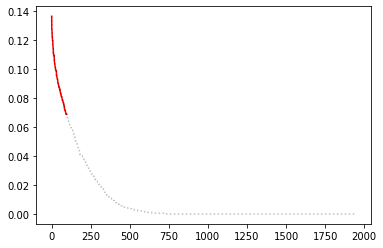

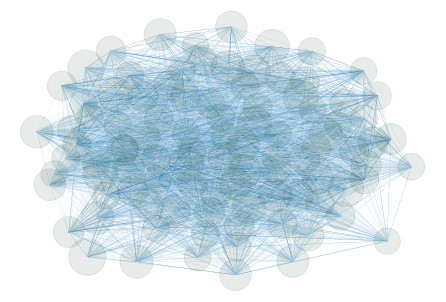

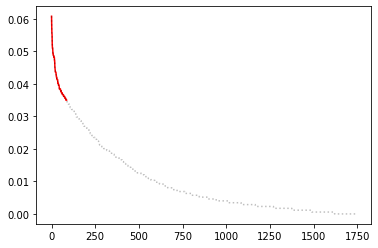

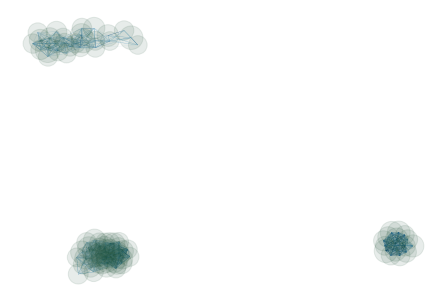

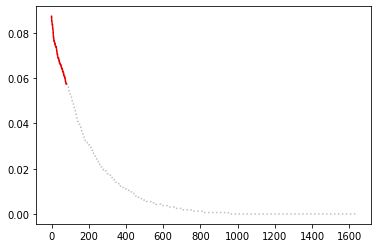

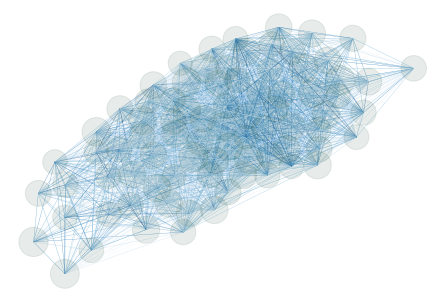

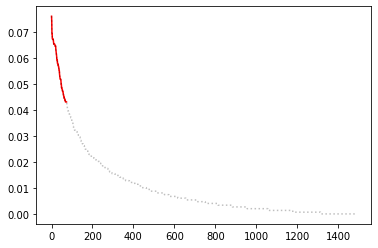

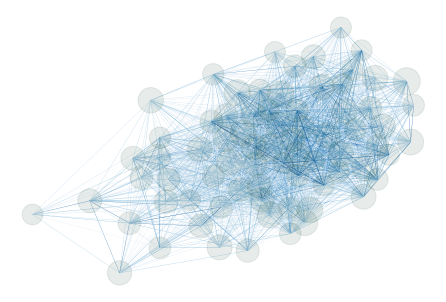

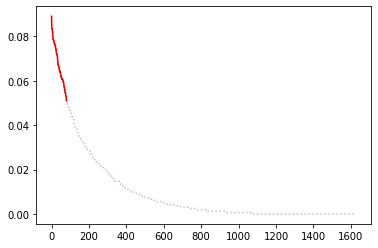

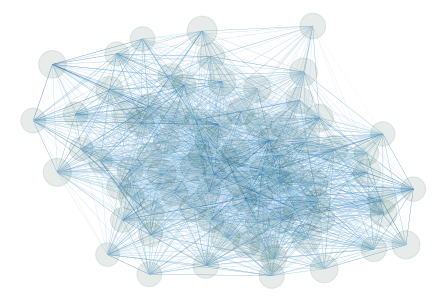

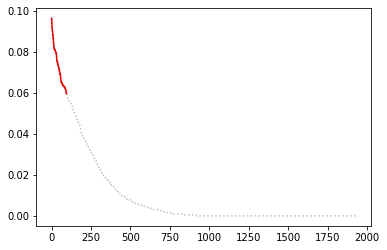

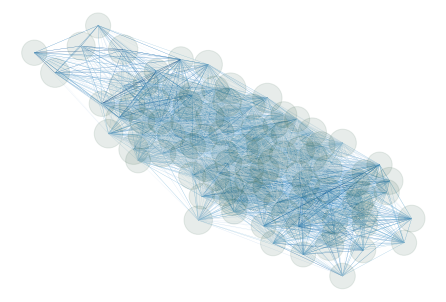

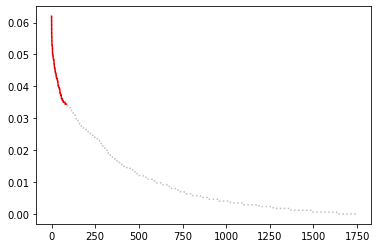

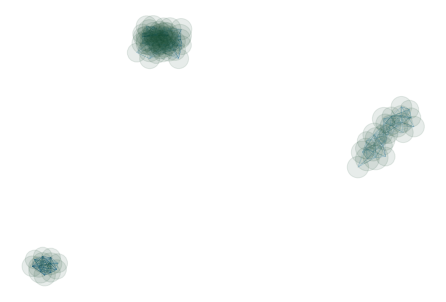

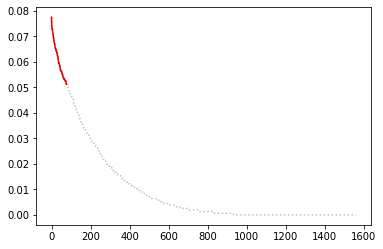

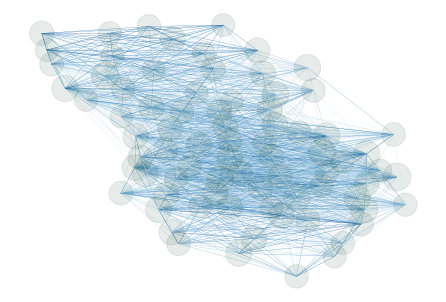

In [16]:
export_prefix = str.split(model_dir,'/')[-1] # grab the postfix

for sample_id in range(N_samples):
    print()
    print('-------------------')
    print('sample: {}'.format(sample_id))
    N_clusters = len(samples[sample_id]['model_names'])
    
    for cluster_id in range(N_clusters):
        print()
        print('sample {} cluster {}'.format(sample_id, cluster_id))
        id_eigcentral_nodes(sample_id, cluster_id, export_prefix, model_dir)
        

[]
[]


ValueError: not enough values to unpack (expected 2, got 0)

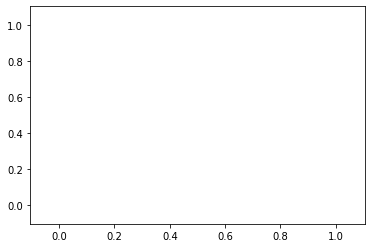

In [17]:
cluster_id = 0
plot_eigcent_nodes(cluster_id)

In [ ]:
cluster_id = 1
plot_eigcent_nodes(cluster_id)

In [ ]:
cluster_id = 2
plot_eigcent_nodes(cluster_id)


In [ ]:
cluster_id = 3
plot_eigcent_nodes(cluster_id)

In [ ]:
cluster_id = 4
plot_eigcent_nodes(cluster_id)